In [36]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 6

In [2]:
uber_urls = ['https://github.com/fivethirtyeight/uber-tlc-foil-response/raw/master/uber-trip-data/uber-raw-data-apr14.csv']

In [22]:
df = pd.concat([
    pd.read_csv(url)
    for url in uber_urls
])
df.rename(columns={'Date/Time': 'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df.datetime)
df.head()

,datetime,Lat,Lon,Base,date
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01


<IPython.core.display.Javascript object>

In [24]:
df['date'] = df.datetime.dt.date
df['hour'] = df.datetime.dt.hour
df.head()

,datetime,Lat,Lon,Base,date,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014-04-01,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014-04-01,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014-04-01,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014-04-01,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014-04-01,0


In [25]:
dfct = pd.crosstab(df.date, df.hour)
dfct.head(10)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,138,66,53,93,166,333,722,1001,780,532,...,736,967,1152,1262,1122,1018,597,878,529,317
2014-04-02,161,82,59,80,196,344,785,1099,927,656,...,868,1138,1313,1600,1252,1086,1143,994,638,348
2014-04-03,194,106,66,130,193,354,750,1022,864,591,...,934,1247,1438,1640,1628,1374,1591,1714,1580,793
2014-04-04,329,184,117,154,238,381,839,1202,1065,769,...,1190,1504,1865,2280,2449,2133,1489,1929,1859,1339
2014-04-05,723,416,215,181,153,177,206,279,340,450,...,704,1078,1313,1445,1575,1440,1348,1572,1830,1700
2014-04-06,1485,940,501,315,201,177,174,226,313,441,...,698,847,806,799,767,641,516,571,390,256
2014-04-07,102,63,57,154,271,388,842,1057,836,585,...,861,1061,1756,2191,2137,2035,1176,1059,646,238
2014-04-08,187,72,63,119,184,427,889,1159,1069,611,...,716,996,1206,1386,1062,929,1127,944,587,298
2014-04-09,154,106,76,139,194,353,821,1050,858,565,...,849,1120,1276,1492,1218,1152,995,988,717,362


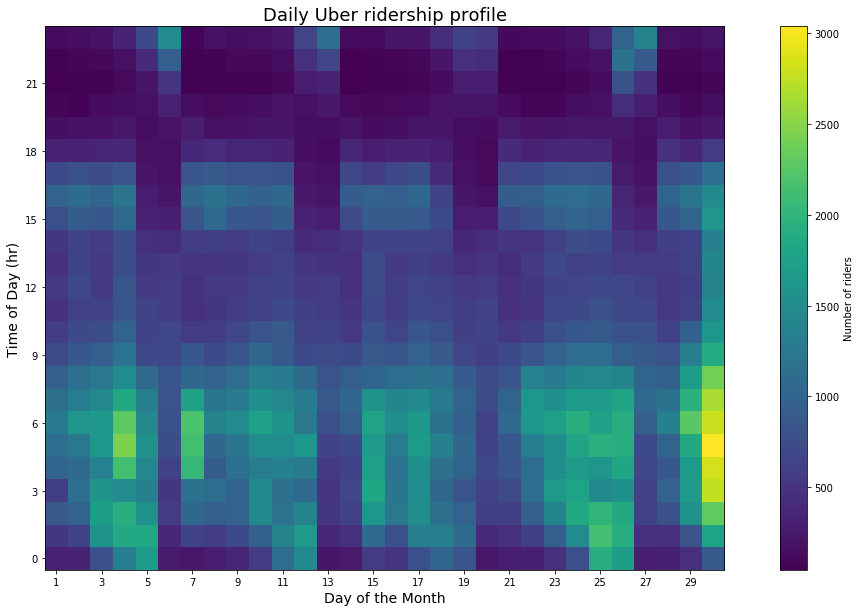

In [156]:
plt.figure(figsize=(20,10))

plt.imshow(dfct.values.T[::-1,:], cmap='viridis', origin='lower')
plt.title('Daily Uber ridership profile', fontsize=18)

plt.xlabel('Day of the Month', fontsize=14)
plt.ylabel('Time of Day (hr)', fontsize=14)
plt.xticks(range(0, dfct.values.shape[0], 2), range(1, dfct.values.shape[0]+1, 2))
plt.yticks(range(0, 24, 3))
plt.colorbar().set_label('Number of riders');

This 